In [1]:
from plots import plot_policy_convergence, plot_final_policies, plot_final_policies_linear, plot_specific_state_policy, plot_specific_state_policy_linear
import pickle

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import copy

# Output v0

In [3]:
# with open('../groups.pkl', 'rb') as f:
#     groups = pickle.load(f)

# with open('../error_vec.pkl', 'rb') as f:
#     error_vec = pickle.load(f)

# with open('../simulation_params.pkl', 'rb') as f:
#     n_day, n_groups, K, n_travelers = pickle.load(f)

with open('output_v0/groups.pkl', 'rb') as f:
    groups = pickle.load(f)

with open('output_v0/error_vec.pkl', 'rb') as f:
    error_vec = pickle.load(f)

with open('output_v0/simulation_params.pkl', 'rb') as f:
    n_day, n_groups, K, n_travelers = pickle.load(f)

with open('output_v0/system.pkl', 'rb') as f:
    system = pickle.load(f)

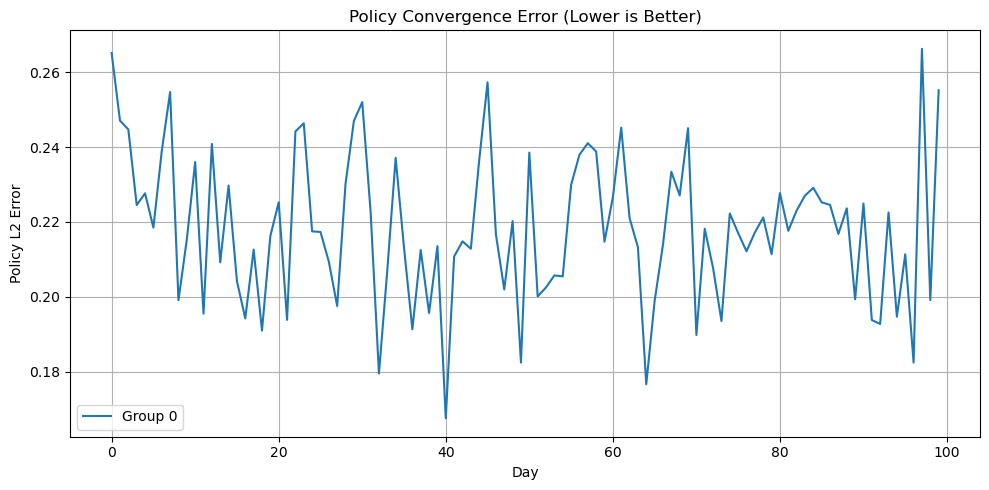

In [4]:
plot_policy_convergence(error_vec, n_day, n_groups)

In [5]:
old_pi = groups[0].pi 
old_Q = groups[0].Q

In [6]:
old_b_star = system.b_star
old_slow_lane_queue = system.slow_lane_queue
old_psi = system.psi

In [7]:
U = 2                 
K = 200    
T = 10

In [8]:
travelers = groups[0].travelers

In [9]:
# one day simulation 
# 1. Travelers act
for tr in travelers:
    tr.store_start_state()
    tr.action()

# 2. System queues
system.simulate_lane_queue()

# 3. Payment
for tr in travelers:
    tr.paid_karma_bid()

# 4. Redistribution
system.karma_redistribution()

# 5. Update urgency
for tr in travelers:
    tr.update_urgency()

# Update each group (independent policies)
g = groups[0]
g.update_transition_matrix()
g.update_policy(system)

In [10]:
# difference in policy by state
np.round(np.linalg.norm(g.pi - old_pi, axis=1), 2)

array([0.06, 0.06, 0.08, 0.05, 0.02, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

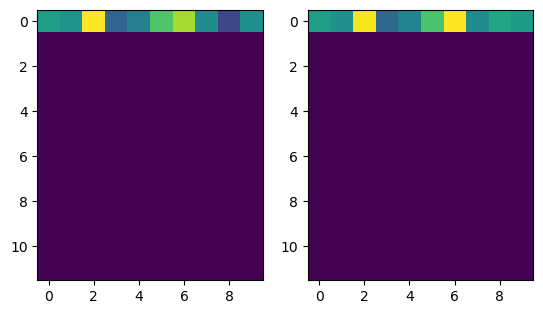

In [11]:
# plot policy by state 
u = 0
k = 0

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

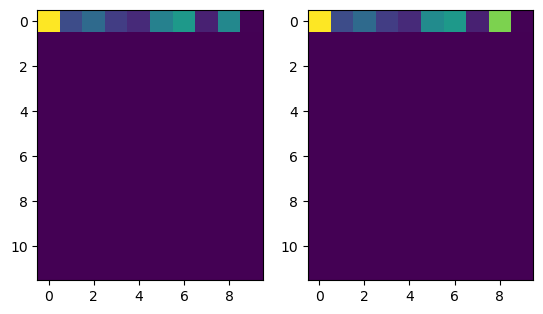

In [12]:
# plot policy by state 
u = 1
k = 0

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

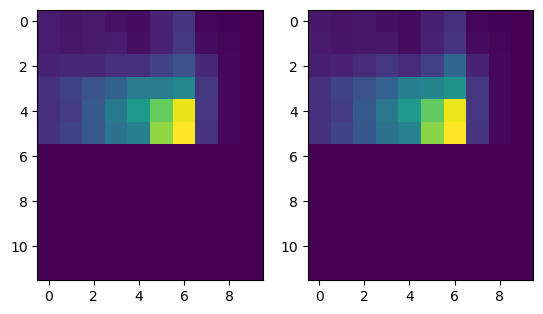

In [13]:
# plot policy by state 
u = 0
k = 5

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

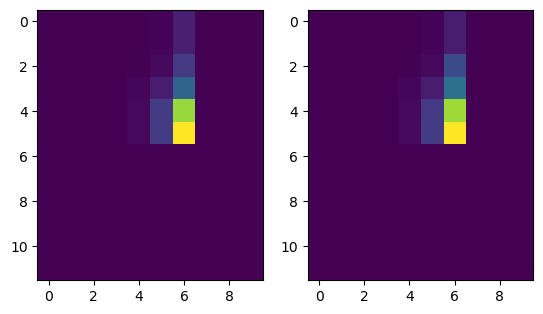

In [14]:
# plot policy by state 
u = 1
k = 5

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

In [15]:
# system dynamics
old_b_star, system.b_star

(array([3., 3., 2., 1., 3., 2., 1., 3., 0., 0.]),
 array([3., 3., 2., 1., 3., 2., 1., 3., 0., 0.]))

# Output v1

changes:
- set K = 50 and k_init = 2

In [3]:
# with open('../groups.pkl', 'rb') as f:
#     groups = pickle.load(f)

# with open('../error_vec.pkl', 'rb') as f:
#     error_vec = pickle.load(f)

# with open('../simulation_params.pkl', 'rb') as f:
#     n_day, n_groups, K, n_travelers = pickle.load(f)

with open('output_v1/groups.pkl', 'rb') as f:
    groups = pickle.load(f)

with open('output_v1/error_vec.pkl', 'rb') as f:
    error_vec = pickle.load(f)

with open('output_v1/simulation_params.pkl', 'rb') as f:
    n_day, n_groups, K, n_travelers = pickle.load(f)

with open('output_v1/system.pkl', 'rb') as f:
    system = pickle.load(f)

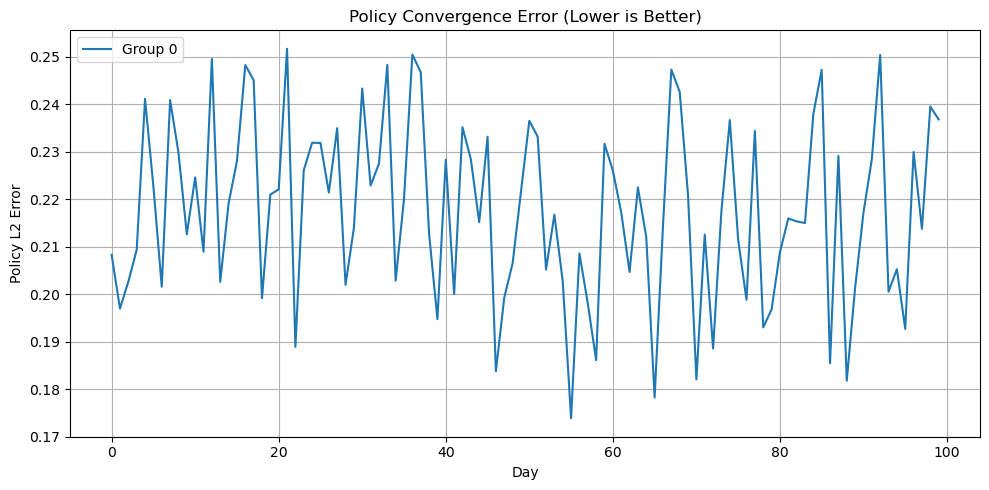

In [4]:
plot_policy_convergence(error_vec, n_day, n_groups)

In [5]:
old_pi = groups[0].pi 
old_Q = groups[0].Q

In [6]:
old_b_star = system.b_star
old_slow_lane_queue = system.slow_lane_queue
old_psi = system.psi

In [12]:
U = 2                 
K = 50    
T = 10

In [8]:
travelers = groups[0].travelers

In [9]:
# one day simulation 
# 1. Travelers act
for tr in travelers:
    tr.store_start_state()
    tr.action()

# 2. System queues
system.simulate_lane_queue()

# 3. Payment
for tr in travelers:
    tr.paid_karma_bid()

# 4. Redistribution
system.karma_redistribution()

# 5. Update urgency
for tr in travelers:
    tr.update_urgency()

# Update each group (independent policies)
g = groups[0]
g.update_transition_matrix()
g.update_policy(system)

In [10]:
# difference in policy by state
np.round(np.linalg.norm(g.pi - old_pi, axis=1), 2)

array([0.08, 0.06, 0.07, 0.04, 0.01, 0.01, 0.01, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.1 , 0.08, 0.09,
       0.04, 0.04, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  ])

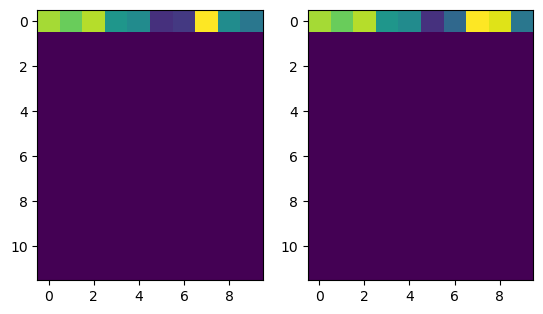

In [13]:
# plot policy by state 
u = 0
k = 0

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

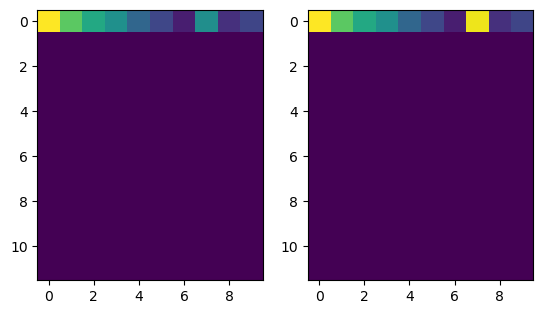

In [14]:
# plot policy by state 
u = 1
k = 0

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

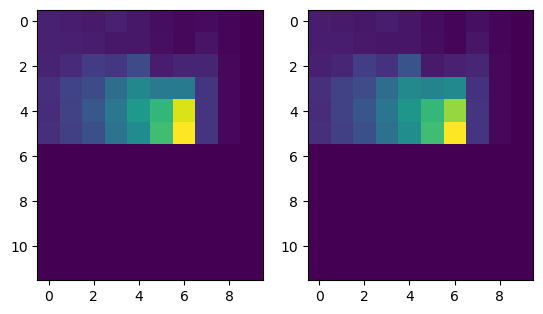

In [15]:
# plot policy by state 
u = 0
k = 5

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

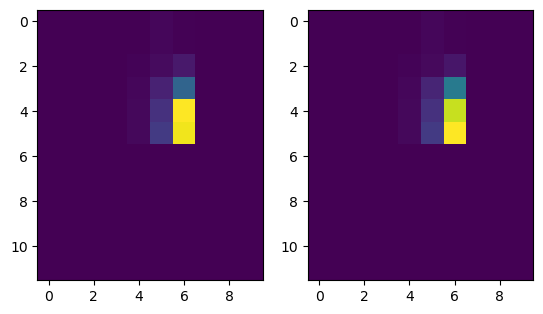

In [16]:
# plot policy by state 
u = 1
k = 5

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

In [17]:
# system dynamics
old_b_star, system.b_star

(array([2., 2., 2., 3., 2., 3., 3., 0., 1., 0.]),
 array([2., 2., 2., 3., 2., 3., 3., 0., 1., 0.]))

# Output v2

Changes:
- set K = 50 and k_init = 2
- Q-value smoothing

In [3]:
# with open('../groups.pkl', 'rb') as f:
#     groups = pickle.load(f)

# with open('../error_vec.pkl', 'rb') as f:
#     error_vec = pickle.load(f)

# with open('../simulation_params.pkl', 'rb') as f:
#     n_day, n_groups, K, n_travelers = pickle.load(f)

with open('output_v2/groups.pkl', 'rb') as f:
    groups = pickle.load(f)

with open('output_v2/error_vec.pkl', 'rb') as f:
    error_vec = pickle.load(f)

with open('output_v2/simulation_params.pkl', 'rb') as f:
    n_day, n_groups, K, n_travelers = pickle.load(f)

with open('output_v2/system.pkl', 'rb') as f:
    system = pickle.load(f)

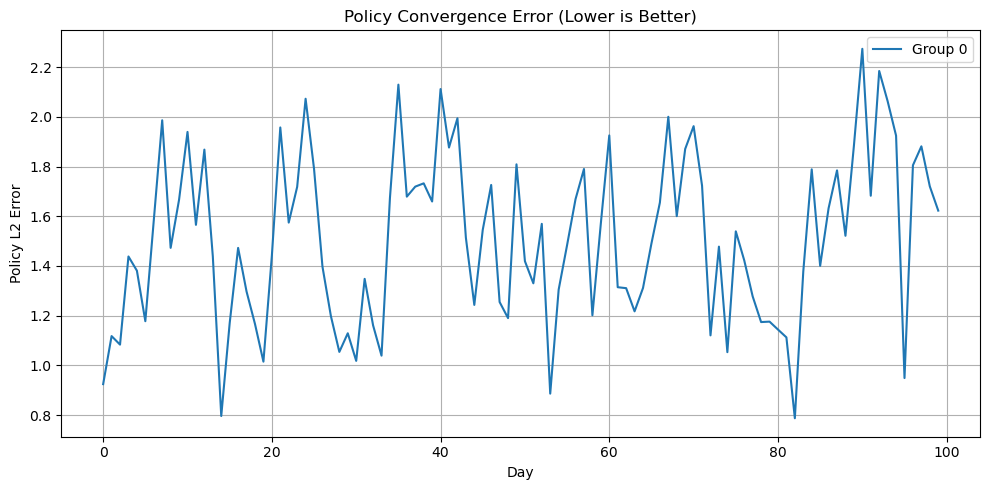

In [4]:
plot_policy_convergence(error_vec, n_day, n_groups)

In [5]:
old_pi = groups[0].pi 
old_Q = groups[0].Q

In [6]:
old_b_star = system.b_star
old_slow_lane_queue = system.slow_lane_queue
old_psi = system.psi

In [7]:
U = 2                 
K = 50    
T = 10

In [8]:
travelers = groups[0].travelers

In [9]:
# one day simulation 
# 1. Travelers act
for tr in travelers:
    tr.store_start_state()
    tr.action()

# 2. System queues
system.simulate_lane_queue()

# 3. Payment
for tr in travelers:
    tr.paid_karma_bid()

# 4. Redistribution
system.karma_redistribution()

# 5. Update urgency
for tr in travelers:
    tr.update_urgency()

# Update each group (independent policies)
g = groups[0]
g.update_transition_matrix()
g.update_policy(system)

In [10]:
# difference in policy by state
np.round(np.linalg.norm(g.pi - old_pi, axis=1), 2)

array([0.42, 0.21, 0.26, 0.14, 0.09, 0.02, 0.01, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.79, 0.58, 0.22, 0.41,
       0.14, 0.08, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  ])

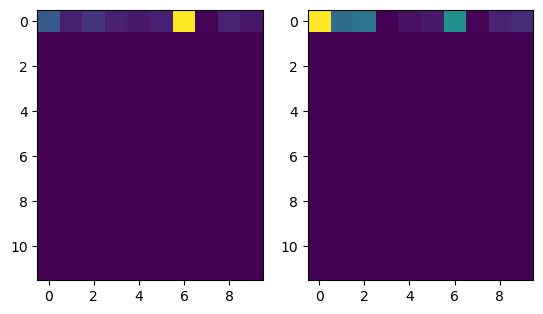

In [11]:
# plot policy by state 
u = 0
k = 0

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

In [12]:
old_Q = old_Q.reshape(U * (K+1), T * (K+1))
Q = g.Q.reshape(U * (K+1), T * (K+1))

In [13]:
old_Q[idx].reshape(T, K+1)[:,0], Q[idx].reshape(T, K+1)[:,0]

(array([-13.97272307, -15.15792236, -14.55487469, -15.06453931,
        -15.33651663, -15.10050925, -12.69039087, -17.50110783,
        -14.99143547, -15.42302434]),
 array([-12.78545077, -13.81713012, -13.73938722, -19.24551526,
        -15.87286497, -15.42545832, -13.46969875, -17.48230256,
        -15.09229193, -14.88072191]))

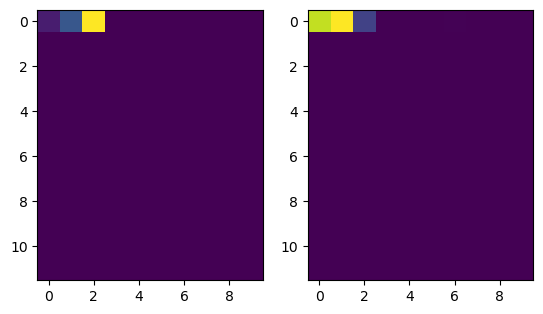

In [14]:
# plot policy by state 
u = 1
k = 0

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

In [15]:
old_Q = old_Q.reshape(U * (K+1), T * (K+1))
Q = g.Q.reshape(U * (K+1), T * (K+1))

In [16]:
old_Q[idx].reshape(T, K+1)[:,0], Q[idx].reshape(T, K+1)[:,0]

(array([-43.04253174, -41.80220946, -40.50482224, -52.92129922,
        -53.79610483, -57.07373693, -50.05473879, -52.82676136,
        -57.26077147, -57.02887872]),
 array([-39.99827856, -39.90329402, -41.52564552, -59.6591693 ,
        -60.83649435, -62.37636323, -45.04926491, -50.54408522,
        -61.13469433, -57.32599085]))

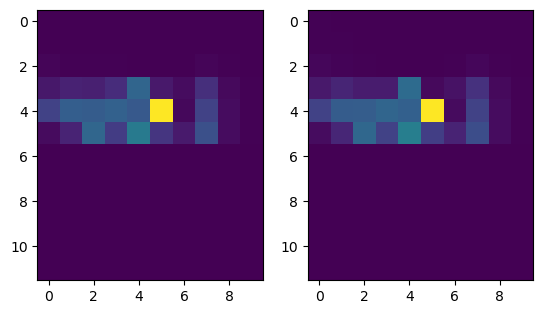

In [17]:
# plot policy by state 
u = 0
k = 5

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

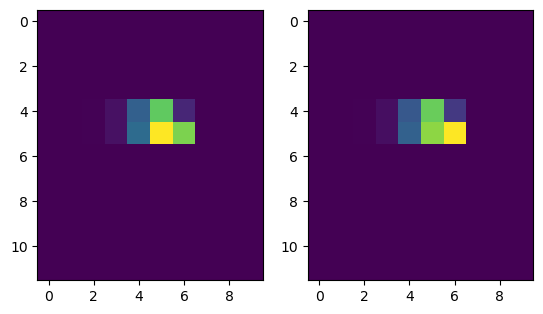

In [18]:
# plot policy by state 
u = 1
k = 5

idx = u * (K+1) + k
old_pi_i = old_pi[idx].reshape(T, K+1).T
pi_i = g.pi[idx].reshape(T, K+1).T

# pi_i.shape
plt.subplot(1,2,1)
plt.imshow(old_pi_i[:12])
plt.subplot(1,2,2)
plt.imshow(pi_i[:12])

In [19]:
# system dynamics
old_b_star, system.b_star

(array([0., 0., 3., 3., 3., 3., 0., 1., 1., 2.]),
 array([0., 0., 3., 3., 3., 3., 0., 1., 1., 2.]))

In [20]:
old_psi, system.psi

(array([0.4       , 0.25      , 0.42857143, 0.66666667, 1.        ,
        0.25      , 1.        , 1.        , 0.08333333, 1.        ]),
 array([0.4       , 0.25      , 0.42857143, 0.66666667, 1.        ,
        0.25      , 1.        , 1.        , 0.08333333, 1.        ]))

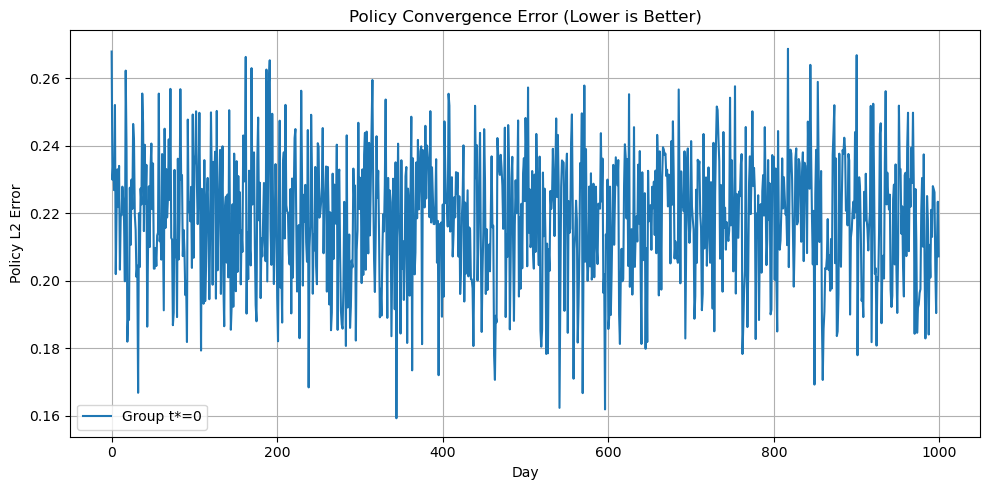

In [3]:
plot_policy_convergence(error_vec, n_day, n_groups)

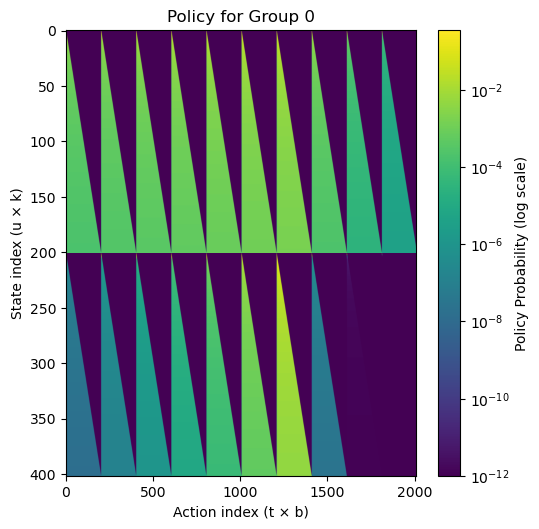

In [4]:
plot_final_policies(groups, n_groups)

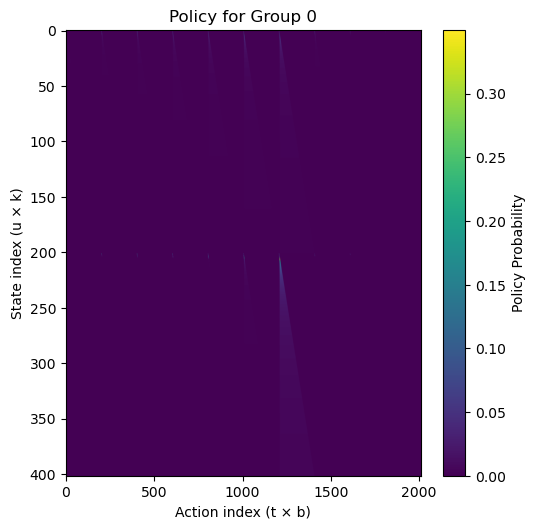

In [5]:
plot_final_policies_linear(groups, n_groups)

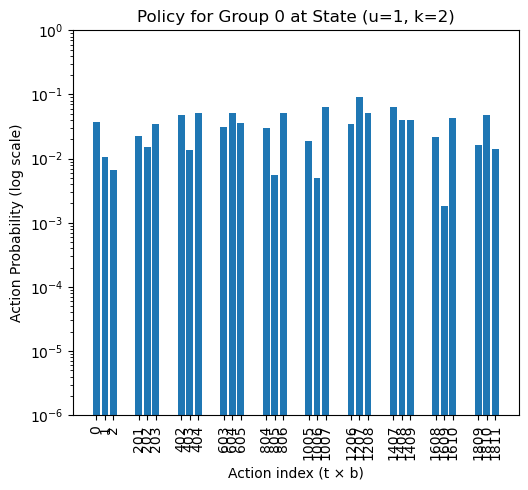

In [98]:
specific_u = 1
specific_k = K // n_travelers

plot_specific_state_policy(groups, n_groups, K, specific_u, specific_k)

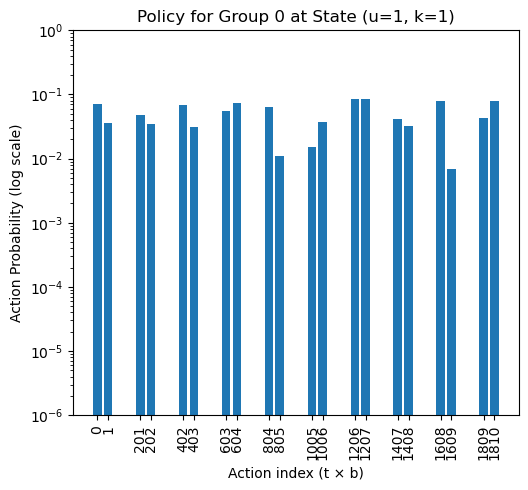

In [99]:
specific_k = 1
plot_specific_state_policy(groups, n_groups, K, specific_u, specific_k)